In [11]:
import importlib
import sys,os,math,time

import networkx as nx
import geopandas as gpd
import numpy as np
import osmnx as ox
import pandas as pd
import rasterio
#import mplleaflet as mpll
import pylab as plt
import json
import pycrs
import seaborn as sns

from shapely.geometry import Point
from rasterio.plot import show, show_hist
from rasterio.mask import mask

gostNetsFolder = os.path.dirname(os.getcwd())
sys.path.insert(0, gostNetsFolder)
import GOSTnet as gn

from pandana.loaders import osm;
import arcgis
from arcgis import GIS
from arcgis.raster.functions import clip
from arcgis import geocode
from arcgis.raster.functions import clip

from osgeo import gdal, gdalconst, gdal_array
from IPython.display import display

In [2]:
gis = GIS(url='https://nkwjones.maps.arcgis.com',username='nj935_',password='Bemelmans1')
print("Logged on as {}".format(gis.properties.user["username"]))

Logged on as nj935_


#### 1. Import population raster

In [68]:
pop_raster = rasterio.open('kampala_pop_2.tiff')

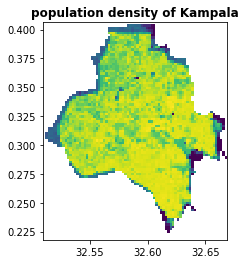

In [70]:
show(pop_raster,title = "population density of Kampala")

#### 2. Get boundary, create fishnet covering it

In [71]:
path = 'data'

In [81]:
! ls

ESRI_pop_health.ipynb   UB_grid_business.dbf    UB_grid_residential.shx
UB_grid.cpg             UB_grid_business.shp    info
UB_grid.dbf             UB_grid_business.shx    kampala_pop.tiff
UB_grid.shp             UB_grid_residential.cpg kampala_pop_2.aux.xml
UB_grid.shx             UB_grid_residential.dbf kampala_pop_2.ovr
UB_grid_business.cpg    UB_grid_residential.shp kampala_pop_2.tiff


In [80]:
points_ED = gpd.read_file("SampleData/Points_employmentdensity.shp")

DriverError: SampleData/Points_employmentdensity.shp: No such file or directory